In [82]:
import seaborn as sns
import matplotlib.pyplot as plot
import pandas as pd
import textwrap as tw
import numpy as np
 

In [83]:
df = pd.read_csv('vgsales_5.csv')
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          553 non-null    int64  
 1   Name          553 non-null    object 
 2   Platform      553 non-null    object 
 3   Year          542 non-null    float64
 4   Genre         553 non-null    object 
 5   Publisher     553 non-null    object 
 6   NA_Sales      553 non-null    float64
 7   EU_Sales      553 non-null    float64
 8   JP_Sales      553 non-null    float64
 9   Other_Sales   553 non-null    float64
 10  Global_Sales  553 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 47.7+ KB


[Text(0, 0, 'Shooter'),
 Text(1, 0, 'Strategy'),
 Text(2, 0, 'Simulation'),
 Text(3, 0, 'Misc'),
 Text(4, 0, 'Action'),
 Text(5, 0, 'Role-\nPlaying'),
 Text(6, 0, 'Puzzle'),
 Text(7, 0, 'Platform'),
 Text(8, 0, 'Adventure'),
 Text(9, 0, 'Racing'),
 Text(10, 0, 'Fighting'),
 Text(11, 0, 'Sports')]

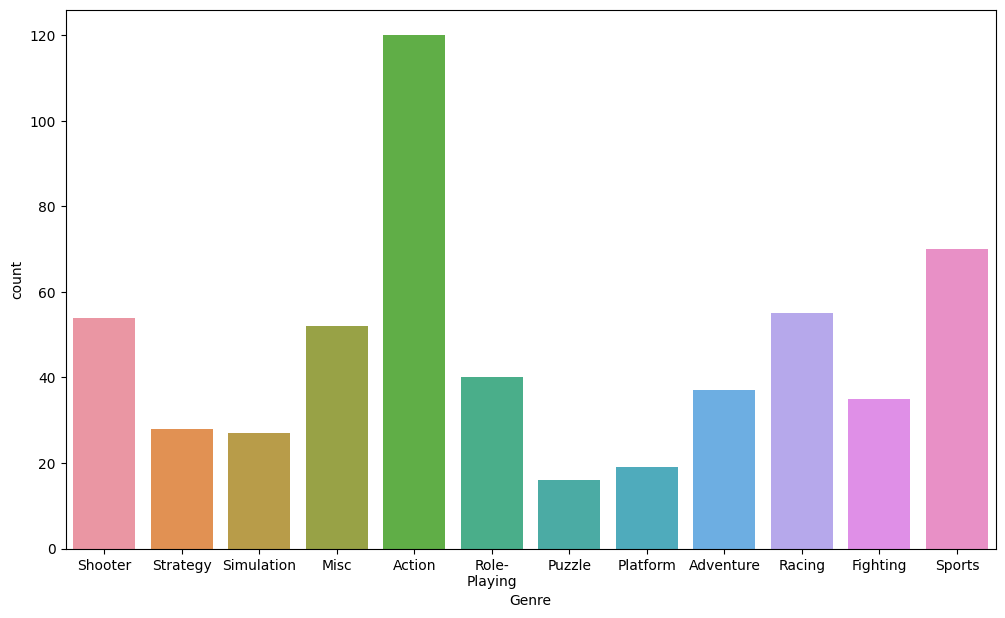

In [103]:
plot.figure(figsize=(12,7))
graph  = sns.countplot(x='Genre',data=df)
 
 
labels = [tw.fill(label.get_text(), 11) for label in graph.get_xticklabels()]
graph.set_xticklabels(labels)

<Axes: xlabel='Genre', ylabel='Global_Sales'>

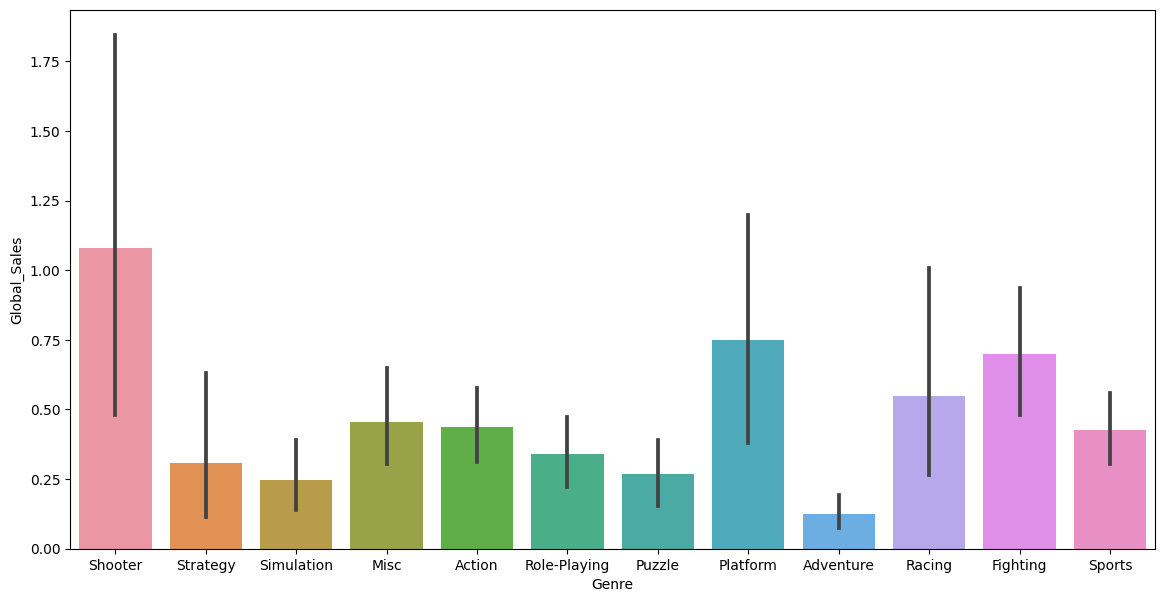

In [78]:
plot.figure(figsize=(14,7))
sns.barplot(x=df['Genre'], y = df['Global_Sales'] )

<Axes: xlabel='Genre', ylabel='Global_Sales'>

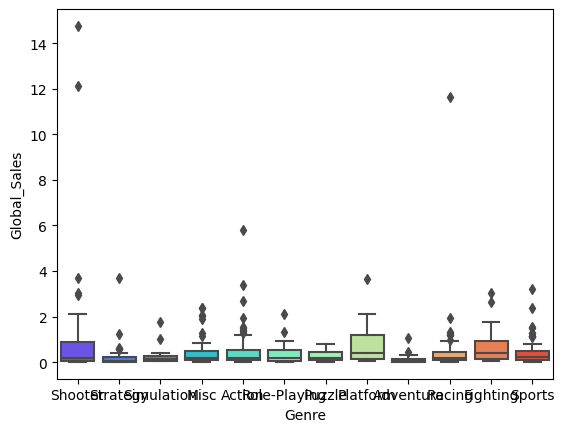

In [85]:
sns.boxplot(x='Genre',y='Global_Sales',data=df, palette='rainbow')

In [47]:
MyHeatMap = sns.heatmap( data =df.index,   annot=True)
MyHeatMap.figure.set_figwidth(10)
MyHeatMap.figure.set_figheight(5) 

IndexError: Inconsistent shape between the condition and the input (got (25, 1) and (25,))

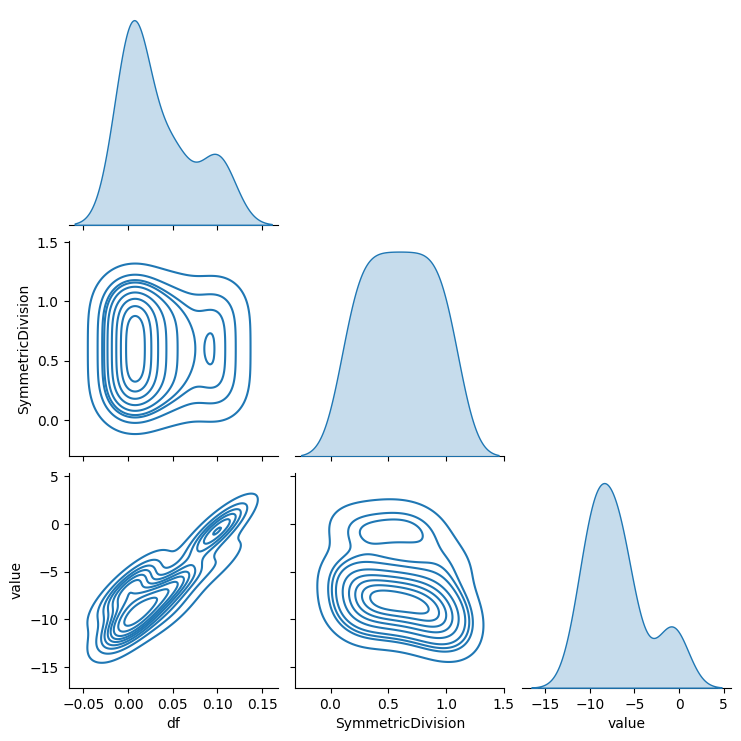

In [78]:
graph = sns.pairplot(df, kind="kde" , corner=True)
 


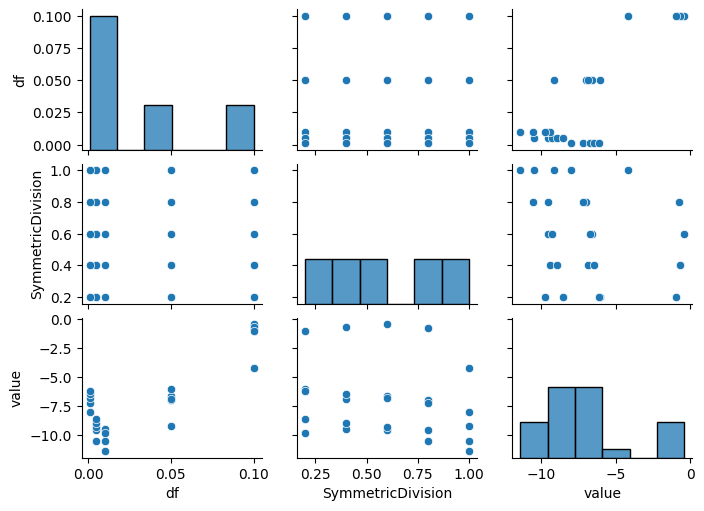

In [75]:
g = sns.PairGrid(df)
 
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.figure.set_figwidth(7)
g.figure.set_figheight(5) 

In [99]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::50]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,0.05,0.00,0.00
50,0.00,0.00,0.35
100,0.35,0.03,0.00
150,0.06,0.05,0.00
200,0.04,0.01,0.00
250,0.11,0.03,0.00
300,0.14,0.19,0.00
350,0.84,0.43,0.00
400,0.01,0.00,0.00
450,0.61,0.87,0.02


In [125]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df_mini)
all_predictions = model.predict(df_mini)
df_mini["KMeans"] = all_predictions
df_mini

c:\Users\Honor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,JP_Sales,DBSCAN,KMeans
0,0.05,0.00,0.00,0,0
1,0.08,0.03,0.00,0,0
2,0.08,0.04,0.00,0,0
3,0.12,0.08,0.74,0,0
4,0.00,0.12,0.00,0,0
...,...,...,...,...,...
548,0.00,0.00,0.13,0,0
549,0.02,0.01,0.00,0,0
550,0.09,0.07,0.00,0,0
551,0.33,0.00,0.00,0,0


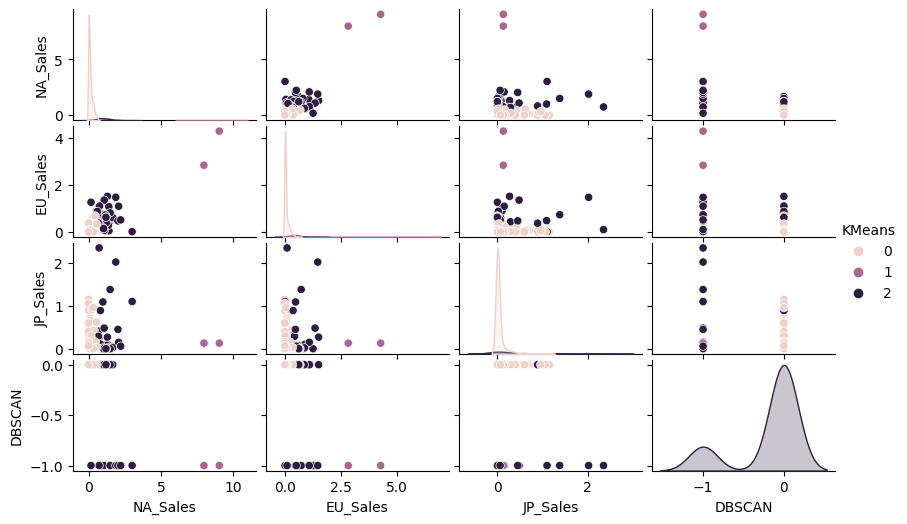

In [126]:
clusterGraph = sns.pairplot(df_mini,hue="KMeans")
clusterGraph.figure.set_figwidth(9)
clusterGraph.figure.set_figheight(5) 

In [121]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::1]
df_mini

from sklearn.cluster import DBSCAN
model = DBSCAN()
model.fit(df_mini)
df_mini["DBSCAN"] = model.labels_
df_mini

,NA_Sales,EU_Sales,JP_Sales,DBSCAN
0,0.05,0.00,0.00,0
1,0.08,0.03,0.00,0
2,0.08,0.04,0.00,0
3,0.12,0.08,0.74,0
4,0.00,0.12,0.00,0
...,...,...,...,...
548,0.00,0.00,0.13,0
549,0.02,0.01,0.00,0
550,0.09,0.07,0.00,0
551,0.33,0.00,0.00,0


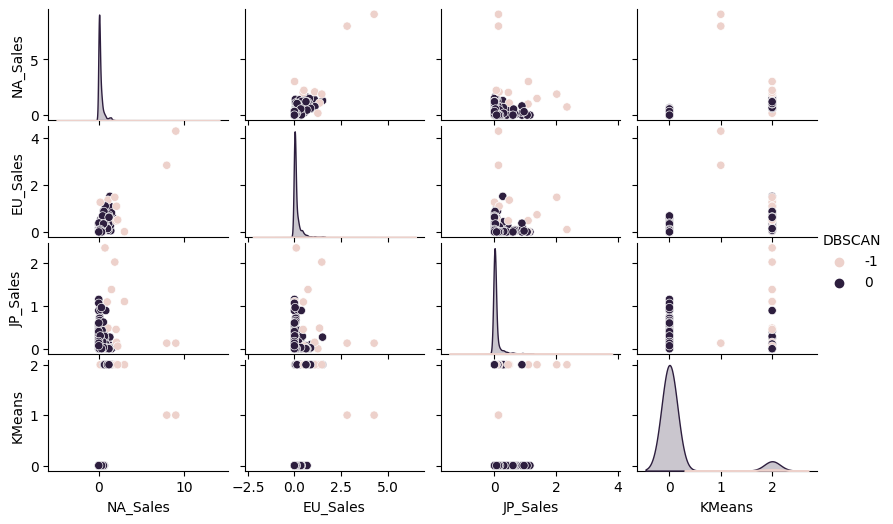

In [131]:
clusterPair = sns.pairplot(df_mini,hue="DBSCAN")
clusterPair.figure.set_figwidth(9)
clusterPair.figure.set_figheight(5) 